<a href="https://colab.research.google.com/github/AdamClarkStandke/GenerativeDeepLearning/blob/main/StableDiffusion_img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image-to-Image with Stable Diffusion

Even though Stable Diffusion is techinically a text-to-image multimodal model in which an image is generated from random noise conditioned on text, Stable Diffusion can also be used for Image-to-Image synthesis. As the [authors](https://arxiv.org/pdf/2112.10752.pdf) state:


> By concatenating spatially aligned conditioning information to the input of $ϵ_θ$, LDMs [latent diffusion models] can serve as efficient general purpose image-to-image translation models


The [Diffusers Library](https://huggingface.co/docs/diffusers/index) of hugging face has various tutorials and this notbook follows the [image-to-image tutorial](https://huggingface.co/docs/diffusers/using-diffusers/img2img) to generate modified input images. As stated by the authors of the image-to-image tutorial:

> Image-to-image is similar to text-to-image, but in addition to a prompt, you can also pass an initial image as a starting point for the diffusion process. The initial image is encoded to latent space and noise is added to it. Then the latent diffusion model takes a prompt and the noisy latent image, predicts the added noise, and removes the predicted noise from the initial latent image to get the new latent image. Lastly, a decoder decodes the new latent image back into an image.

For this notebook I used the Stable Diffusion v1.5 model from stabilityai which as previously detailed in other notebooks is a latent diffusion model initialized from an earlier checkpoint and further finetuned for 595K steps on 512x512 images.

---

## How to use:


1.   Run the First Cell Block to load model/weights and other dependencies
2.   In the Second Cell Block:
    1.   First type in the **img** field the path of the input image to be used (e.g., url, filepath ending in a image format like png, jpeg)

    2.   Then enter the text in the **prompt** field to manipulate the input image into the generated image you want (e.g.,Astronaut in a jungle, cold color palette, muted colors, detailed, 8k)

    3. Finally (and optionally) play with with the following arguments before executing the cell:
        1. Alter the values of **Creativity** which represents the strength parameter. This parameter determines how much the generated image resembles the intial image. A higher value leads the generated image to be less like the initial image and vice versa. Strength and num_inference_steps parameters are related because strength determines the number of noise steps to add. For example, if the num_inference_steps is 50 and strength is 0.8, then this means adding 40 (50 * 0.8) steps of noise to the initial image and then denoising for 40 steps to get the newly generated image.

        2. Alter the values of **Guide** which represents the guidance_scale parameter. This parameter controls how closely aligned the text prompt is to the generated image. A higher value means the generated image will be more alligned to the text prompt and vice versa (i.e. generated image has more space to deviate from the textual prompt)

        3. Alter the field **negative_prompt** which conditions the model to *not* include things in the generated image.
     

---








# First Cell Block:

In [ ]:
pip install diffusers transformers accelerate scipy safetensors -q
import torch
from diffusers import  StableDiffusionImg2ImgPipeline, DPMSolverMultistepScheduler
from diffusers.utils import make_image_grid, load_image
from PIL import Image
model_id = "stabilityai/stable-diffusion-2-1"
pipe=StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 27.6 MB/s eta 0:00:00


# Second Cell Block:

  0%|          | 0/12 [00:00<?, ?it/s]

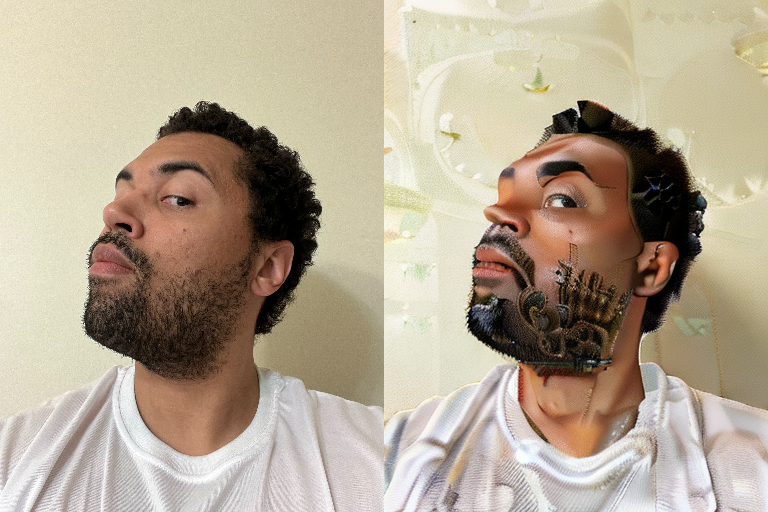

In [ ]:
img = "/content/dad_with_afro.png" #@param { type: "string" }
im = load_image(img)
Creativity = 0.24 #@param  { type:"slider", min: 0, max: 1, step: 0.01 }
Guide = 10 #@param { type:"slider", min: 0, max: 14, step: 1 }
im.resize((512, 512))
prompt = "black king with crown, detailed, fantasy, dark, Pixar, Disney, 8k"#@param { type: "string" }
negative_prompt = "deformed, disfigured, poor details, bad anatomy"#@param { type: "string" }
image = pipe(prompt, image=im, strength=Creativity, guidance_scale=Guide, negative_prompt=negative_prompt).images[0]
image.save("astronaut_rides_horse.png")
image.resize((512, 512))
make_image_grid([im, image], rows=1, cols=2)